# CitiBike Ride Exploration and Visualization 2022
## by Ifeoma Ugbomah

## Investigation Overview


>[Citi Bike](https://en.wikipedia.org/wiki/Citi_Bike) is New York City’s bike share system, and the largest in the nation. Citi Bike launched in May 2013 and has become an essential part of transportation network. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 8-month ride trips data in 2022.

>**N.B**: The data used for this exploration is data from **`January`** to **`August`**.


## Dataset Overview

> The dataset used for this exploratory analysis consists of monthly individual trip data from January 2020 to August 2022 in CSV format covering the greater New York City area, raw data is available [here](https://www.citibikenyc.com/system-data). Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,6)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips22 = pd.read_csv('citibike_trips_2022.csv')

# drop missing values in end_station_id and end_station_name, and end_lat and end_lng.
trips22 = trips22.dropna(axis=0)

trips22['started_at'] = pd.to_datetime(trips22['started_at'])
trips22['ended_at'] = pd.to_datetime(trips22['ended_at'])

trips22['duration_minute'] = trips22['ended_at'] - trips22['started_at']
trips22['duration_minute'] = trips22['duration_minute'].dt.components.minutes

trips22['start_date'] = trips22['started_at'].dt.date
trips22['start_hourofday'] = trips22['started_at'].dt.hour
trips22['start_dayofweek'] = trips22['started_at'].dt.day_name()
trips22['start_month'] = trips22['started_at'].dt.month_name()

trips22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578377 entries, 0 to 580385
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             578377 non-null  object        
 1   rideable_type       578377 non-null  object        
 2   started_at          578377 non-null  datetime64[ns]
 3   ended_at            578377 non-null  datetime64[ns]
 4   start_station_name  578377 non-null  object        
 5   start_station_id    578377 non-null  object        
 6   end_station_name    578377 non-null  object        
 7   end_station_id      578377 non-null  object        
 8   start_lat           578377 non-null  float64       
 9   start_lng           578377 non-null  float64       
 10  end_lat             578377 non-null  float64       
 11  end_lng             578377 non-null  float64       
 12  member_casual       578377 non-null  object        
 13  duration_minute     578377 no

## User Types and Their Monthly Usage
> Members contributed the majority of the bike usage in 2022 between January to August with value about 64.1%, while 36.9% were comsumed by casual users. The bike sharing usage tend to increase with month.

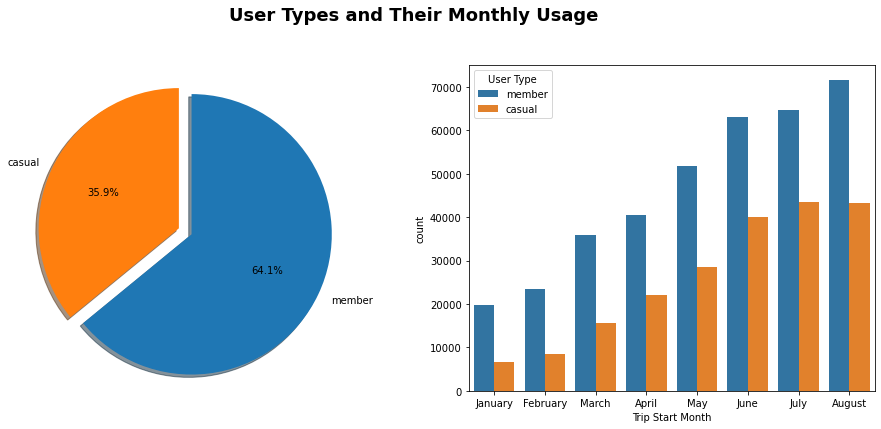

In [3]:
base_color =  sns.color_palette()[3]

plt.subplot(1, 2, 1)
sorted_vals = trips22['member_casual'].value_counts()/trips22.shape[0]
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True)
plt.axis('square')

plt.subplot(1, 2, 2)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips22['start_month'] = trips22['start_month'].astype(monthcat)

ax = sns.countplot(data=trips22, x='start_month', hue='member_casual')
ax.legend(title='User Type')
plt.xlabel('Trip Start Month')

plt.suptitle('User Types and Their Monthly Usage', fontsize=18, fontweight='semibold', y=1.015);

## Average Weekly Trip Duration for Members and Casuals

> Members ride much shorter/quicker trips compared to casuals on each day of the week. Both user type have increase usage from Tuesday to Saturday with a drastic fall between MOnday to Tuesday, with the highest peak on Sunday.

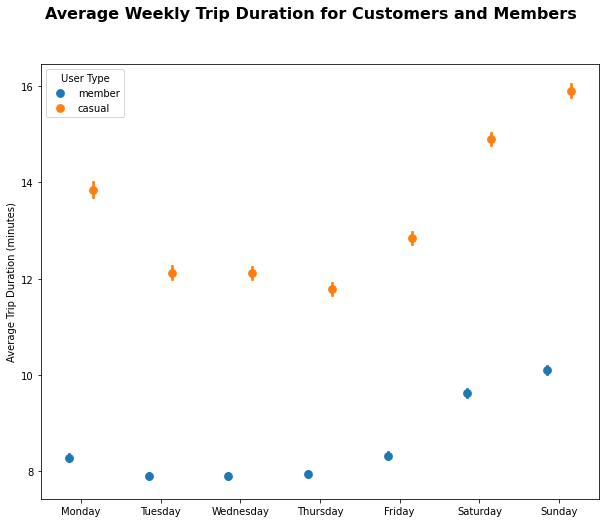

In [4]:
plt.figure(figsize=[10,8])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips22['start_dayofweek'] = trips22['start_dayofweek'].astype(weekdaycat)

ax = sns.pointplot(data=trips22, x='start_dayofweek', y='duration_minute', hue='member_casual', dodge=0.3, linestyles='')
ax.legend(title='User Type')
plt.xlabel('')
plt.ylabel('Average Trip Duration (minutes)')
plt.suptitle('Average Weekly Trip Duration for Customers and Members', fontsize=16, fontweight='semibold');

## Average Weekly Trip Duration for Ride Types

> Docked bikes seems to be the most use bike among the three bike types, with large average trip duration compared to classic and electric bikes with little difference between both.

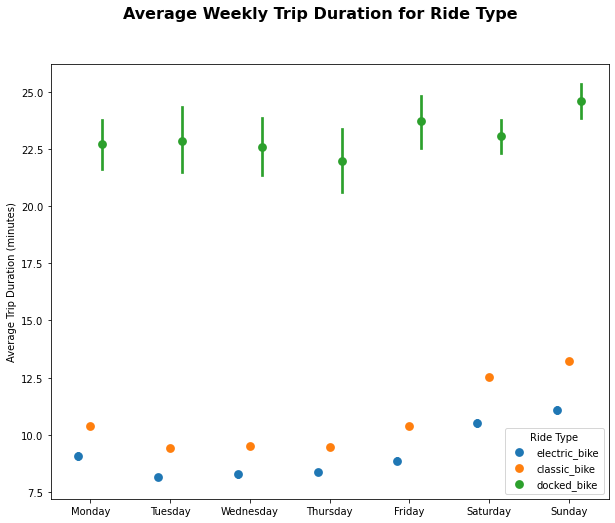

In [5]:
plt.figure(figsize=[10,8])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips22['start_dayofweek'] = trips22['start_dayofweek'].astype(weekdaycat)

ax = sns.pointplot(data=trips22, x='start_dayofweek', y='duration_minute', hue='rideable_type', dodge=0.3, linestyles='')
ax.legend(title='Ride Type')
plt.xlabel('')
plt.ylabel('Average Trip Duration (minutes)')
plt.suptitle('Average Weekly Trip Duration for Ride Type', fontsize=16, fontweight='semibold');

## Summary

> There was a lot more members using the bike sharing system than casual customers overall, of which usage inreases with month. Obviously different usage patterns and riding habits are observed between the two types of riders. Members used the system heavily on work days concentrated around 17-19pm, whereas casuals ride a lot over weekends for leisure/touring purposes. Members tended to have much shorter/quicker trips compared to casuals which makes member usage more efficient.

In [6]:
!jupyter nbconvert citibike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook citibike_slide_deck.ipynb to slides
[NbConvertApp] Writing 672925 bytes to citibike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\DeySholey\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\DeySholey\anaconda3\lib\site-packa